### Learn Pandas in 10 minutes

[https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Датасет
Мы будем работать с датасетом задержек авиарейсов https://www.kaggle.com/datasets/usdot/flight-delays. Скачайте файлы из этого датасета.

### Чтение данных

`pd.read_csv` считает таблицу в объект типа датафрейм

`df.head` покажет пять (по умолчанию) верхних строк таблицы:

In [3]:
df = pd.read_csv('flights.csv')
df.head()

/var/folders/wx/_29jf6715_v4vhw4nn5fqcpw0000gn/T/ipykernel_29631/2162358262.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Из чего состоит таблица

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png)

Индексация строк/столбцов

![](https://i0.wp.com/sparkbyexamples.com/wp-content/uploads/2021/10/pandas-difference-loc-vs-iloc.png?resize=840%2C353&ssl=1)

Размеры таблицы

In [4]:
len(df), df.shape

(5819079, (5819079, 31))

Список названий колонок

In [5]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Базовая информация по колонкам

In [6]:
print(df.info(null_counts=True))

/var/folders/wx/_29jf6715_v4vhw4nn5fqcpw0000gn/T/ipykernel_29631/3928017299.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df.info(null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 5819079 non-null  int64  
 1   MONTH                5819079 non-null  int64  
 2   DAY                  5819079 non-null  int64  
 3   DAY_OF_WEEK          5819079 non-null  int64  
 4   AIRLINE              5819079 non-null  object 
 5   FLIGHT_NUMBER        5819079 non-null  int64  
 6   TAIL_NUMBER          5804358 non-null  object 
 7   ORIGIN_AIRPORT       5819079 non-null  object 
 8   DESTINATION_AIRPORT  5819079 non-null  object 
 9   SCHEDULED_DEPARTURE  5819079 non-null  int64  
 10  DEPARTURE_TIME       5732926 non-null  float64
 11  DEPARTURE_DELAY      5732926 non-null  float64
 12  TAXI_OUT             5730032 non-null  float64
 13  WHEELS_OFF           5730032 non-null  float64
 14  SCHEDULED_TIME       5819073 non-null  float64
 15

Обратите внимание: колонки, в которых по смыслу стоит время, преобразовались в тип float. В результате запись 0005 превратилась в число 5. Чтобы избежать таких проблем, будем считывать данные как строковые переменные:

In [7]:
df = pd.read_csv('flights.csv', dtype=str)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Определим колонки с пропущенными значениями

In [8]:
df.isna().any(axis=0)

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool

Найдем строки, для которых не указано время отправления или прибытия

In [9]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Length: 5819079, dtype: bool

Найдем количество таких строк

In [10]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1).sum()

92513

и выбросим их

In [11]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]

Пример подсчета уникальных элементов в столбце

In [12]:
df['AIRLINE'].value_counts()
df.AIRLINE.value_counts()

WN    1245053
DL     871946
AA     714855
OO     577943
EV     556425
UA     508916
MQ     279431
B6     262687
US     194586
AS     171692
NK     115343
F9      90231
HA      76093
VX      61365
Name: AIRLINE, dtype: int64

Плохой пример построения гистограмм по значениям в столбце

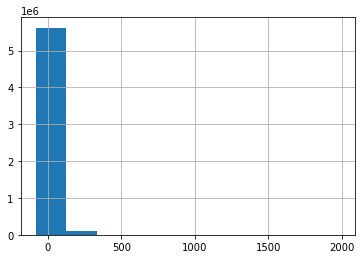

In [13]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
df.DEPARTURE_DELAY.hist()
plt.show()

Более показательный график

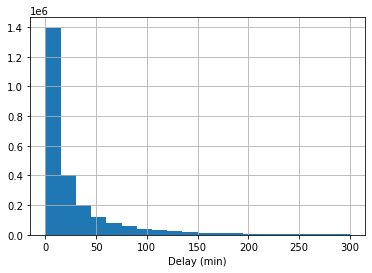

In [14]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.DEPARTURE_DELAY.hist(bins=20, range=(0, 300))
plt.xlabel('Delay (min)')
plt.show()

Базовые статистики

In [15]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].mean()

32.56361401062445

In [16]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].std()

52.97401649681914

In [17]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].median()

14.0

Создание колонки с датой, вместо трех отдельных колонок

In [18]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Length: 5726566, dtype: datetime64[ns]

Создание новой колонки в таблице

In [19]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Пример использования:

In [20]:
df.loc[df.DATE <= pd.to_datetime('2015-02-14')]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681023,2015,2,14,6,B6,1503,N547JB,JFK,SJU,2359,...,45,0,0,NaN,45,0,0,0,0,2015-02-14
681024,2015,2,14,6,US,1770,N825AW,SLC,PHL,2359,...,-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-14
681025,2015,2,14,6,US,467,N642AW,PHX,MSP,2359,...,86,0,0,NaN,0,0,86,0,0,2015-02-14
681026,2015,2,14,6,F9,300,N204FR,DEN,TPA,2359,...,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-14


Удалим ненужные более столбцы 

In [21]:
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
df.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,0005,2354,-11.0,21,...,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8.0,12,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,0020,0018,-2.0,16,...,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5.0,15,...,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,0025,0024,-1.0,11,...,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


Как поменять порядок столбцов?

In [22]:
cols = list(df.columns)
cols[-1:] + cols[:-1]

['DATE',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

Переместим последний столбец на первое место

In [23]:
df = df[cols[-1:] + cols[:-1]]
df.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,0005,2354,-11.0,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8.0,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,0020,0018,-2.0,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5.0,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,0025,0024,-1.0,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим на столбец ORIGIN_AIRPORT. В нем много непонятных значений

In [24]:
df.ORIGIN_AIRPORT.unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'DFW', 'MKE', 'IAH',
       'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'PHL', 'SBN', 'EUG', 'IAD',
       'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT', 'SMF', 'AUS', 'MCI',
       'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA', 'SAT', 'CHS', 'SBA',
       'IND', 'CLE', 'GSP', 'BDL', 'RIC', 'BFL', 'OMA', 'RDM', 'FLL',
       'CID', 'TPA', 'SYR', 'ROC', 'TYR', 'LAN', 'GSO', 'EWR', 'PBI',
       'RSW', 'OAK', 'PVD', 'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'TUL',
       'LGA', 'LIT', 'MSY', 'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT',
       'SAV', 'CLT', 'GRB', 'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX',
       'CWA', 'TTN', 'RDU', 'CVG', 'BHM', 'ACY', 'DTW', 'RAP', 'TUS',
       'EAU', 'DLH', 'FSD', 'INL', 'SPI', 'CLD', 'COD', 'CMH', 'PSC',
       'CPR', 'ACV', 'DAL', 'PAH', 'MRY', 'ESC', 'ISN', 'PSP', 'CAE',
       'STL', 'BTV',

Как отделить нормальные значения от ненормальных? Например, по длине строки:

In [25]:
df.ORIGIN_AIRPORT.apply(len)

0          3
1          3
2          3
3          3
4          3
          ..
5819074    3
5819075    3
5819076    3
5819077    3
5819078    3
Name: ORIGIN_AIRPORT, Length: 5726566, dtype: int64

Фильтруем датасет (комментарий: на практике не нужно доверять признаку длина строки, лучше непосредственно проверять, если ли данная запись в справочнике аэропортов)

In [26]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]

In [27]:
df.AIRLINE.unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'F9',
       'WN', 'MQ', 'VX'], dtype=object)

Метод loc позволяет получать срезы датасета. Например, найдем из каких городов летает авиакомпание АА:

In [28]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].unique()

array(['LAX', 'SFO', 'LAS', 'SEA', 'DEN', 'PHX', 'MCO', 'DFW', 'BOS',
       'IAH', 'SAT', 'JFK', 'AUS', 'EWR', 'MIA', 'SLC', 'BWI', 'MCI',
       'TUL', 'LGA', 'LIT', 'PDX', 'TPA', 'SMF', 'MSY', 'OMA', 'OKC',
       'DCA', 'STL', 'SJU', 'MKE', 'BNA', 'MSP', 'SAN', 'RDU', 'IAD',
       'CLT', 'PHL', 'PBI', 'JAX', 'PIT', 'COS', 'DSM', 'RIC', 'BDL',
       'SNA', 'BHM', 'MEM', 'CLE', 'ATL', 'FAT', 'DAY', 'ORF', 'IND',
       'CMH', 'ELP', 'ONT', 'RNO', 'SJC', 'ABQ', 'PSP', 'RSW', 'FLL',
       'JAC', 'TUS', 'HNL', 'ORD', 'EGE', 'DTW', 'STT', 'MFE', 'STX',
       'HDN', 'ICT', 'KOA', 'HOU', 'OGG', 'GUC', 'LIH', 'SDF', 'MTJ',
       'PNS', 'LBB', 'XNA', 'ANC', 'OAK', 'PVD', 'BUF', 'BOI', 'ALB',
       'PWM', 'SYR', 'GEG', 'GSO', 'CHS', 'ILM', 'ROC', 'MDT'],
      dtype=object)

Также легко найти из каких городов АА делает наибольшее число рейсов

In [29]:
df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()

DFW    131464
ORD     49688
MIA     47792
CLT     41512
LAX     32409
        ...  
GUC       113
MDT        49
MTJ        29
XNA        18
LIT         9
Name: ORIGIN_AIRPORT, Length: 98, dtype: int64

Иногда вместо таблиц удобно смотреть на графики. У датафрейма и серии есть встроенный метод plot

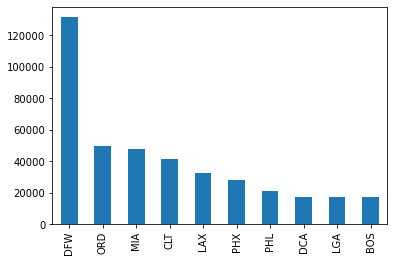

In [30]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.loc[df.AIRLINE == 'AA', 'ORIGIN_AIRPORT'].value_counts()[:10].plot(kind='bar')
plt.show()

Еще один способ как найти перевозчика с наибольшим числом рейсов. Методом groupby

In [31]:
df.groupby('AIRLINE').size().sort_values()[::-1]

AIRLINE
WN    1140890
DL     796418
AA     638313
OO     529394
EV     511186
UA     463158
MQ     257726
B6     240906
US     194586
AS     157268
NK     105198
F9      82142
HA      69863
VX      55924
dtype: int64

Найдем, сколько времени самолеты каждой авиакомпании проводят в воздухе. Обратите внимание, что сначала строковые значения нужно привести в числовой тип:

In [32]:
df.AIR_TIME = df.AIR_TIME.astype(float)
df.groupby('AIRLINE')['AIR_TIME'].sum()

AIRLINE
AA     89473152.0
AS     24786823.0
B6     34637886.0
DL     92137719.0
EV     37151025.0
F9     10691374.0
HA      5931683.0
MQ     17292639.0
NK     13905437.0
OO     39974767.0
UA     76413094.0
US     24428249.0
VX     10214217.0
WN    117560358.0
Name: AIR_TIME, dtype: float64

Найдем авиакомпанию, у которой больше всего география вылетов (как еще можно решить эту задачу?)

In [33]:
df.groupby('AIRLINE')['ORIGIN_AIRPORT'].nunique().sort_values()[::-1]

AIRLINE
OO    211
EV    181
DL    156
MQ    133
AA     98
UA     94
WN     86
US     79
AS     67
B6     64
F9     63
NK     34
VX     21
HA     17
Name: ORIGIN_AIRPORT, dtype: int64

У какой авиакомпании больше всего маршрутов?

In [34]:
df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']
df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1]

AIRLINE
EV    1381
WN    1333
OO    1322
DL     963
AA     707
UA     702
MQ     428
B6     341
US     340
F9     333
NK     316
AS     251
VX      71
HA      56
Name: ROUTE, dtype: int64

Пора заменить кодовые названия авиакомпаний и аэропортов на полные названия. Для этого нужно соединять таблицы из датасета. Есть как минимум 4 способа это сделать:

![](https://www.tektutorialshub.com/wp-content/uploads/2019/12/Differences-in-inner-and-left-right-and-full-outer-joins.png)

Таблица перевозчиков

In [35]:
df_air = pd.read_csv('airlines.csv')
df_air.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


Подготовим левую таблицу

In [36]:
tmp = df.groupby('AIRLINE')['ROUTE'].nunique().sort_values()[::-1].to_frame().reset_index()
tmp.head()

,AIRLINE,ROUTE
0,EV,1381
1,WN,1333
2,OO,1322
3,DL,963
4,AA,707


Сделаем одно необязательное действие по переименованию колонок

In [37]:
tmp = tmp.rename(columns={'AIRLINE': 'IATA_CODE'})
tmp.head()

,IATA_CODE,ROUTE
0,EV,1381
1,WN,1333
2,OO,1322
3,DL,963
4,AA,707


Соединим две таблицы по ключу IATA_CODE

In [38]:
tmp.merge(df_air, on='IATA_CODE')

,IATA_CODE,ROUTE,AIRLINE
0,EV,1381,Atlantic Southeast Airlines
1,WN,1333,Southwest Airlines Co.
2,OO,1322,Skywest Airlines Inc.
3,DL,963,Delta Air Lines Inc.
4,AA,707,American Airlines Inc.
5,UA,702,United Air Lines Inc.
6,MQ,428,American Eagle Airlines Inc.
7,B6,341,JetBlue Airways
8,US,340,US Airways Inc.
9,F9,333,Frontier Airlines Inc.


Теперь поработаем с аэропортами и изобразим на георгрфической карты все маршруты одной из компаний

Считаем таблицу аэропортов

In [39]:
df_arp = pd.read_csv('airports.csv')
df_arp.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


Нам потребуется библиотека basemap. Скорее всего, ее придется установить с помощью команды pip install basemap в терминале или в ячейке ноутбука

In [40]:
!pip install basemap

  Using cached basemap-1.3.6.zip (156 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/dmitrijkudrasov/opt/anaconda3/bin/python /Users/dmitrijkudrasov/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders/wx/_29jf6715_v4vhw4nn5fqcpw0000gn/T/tmpac2gz0rz
       cwd: /private/var/folders/wx/_29jf6715_v4vhw4nn5fqcpw0000gn/T/pip-install-iqxjz58c/basemap_0017803e97454c0fa084abcd01c2d254
  Complete output (35 lines):
  <string>:58: RuntimeWarning: Cannot find GEOS library and/or headers in standard locations ('/Users/dmitrijkudrasov/local', '/Users/dmitrijkudrasov', '/usr/local', '/usr', '/opt/local', '/opt', '/sw'). Please install the corresponding packages using your s

Отрисуем карту

In [41]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(15, 10))
land = Basemap(projection='lcc', resolution=None,
               width=15E6, height=8E6, 
               lat_0=45, lon_0=-100,)
land.etopo(scale=0.5, alpha=0.9)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Теперь выберем одного перевозчика и все его маршруты:

In [ ]:
routes = df.loc[df.AIRLINE == 'AA', ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].drop_duplicates()
routes

Нам нужно создать два массива с координатами городом вылета и приземления

In [ ]:
orig = routes[['ORIGIN_AIRPORT']].merge(df_arp,
                                        left_on='ORIGIN_AIRPORT',
                                        right_on='IATA_CODE',
                                        how='left')
dest = routes[['DESTINATION_AIRPORT']].merge(df_arp,
                                             left_on='DESTINATION_AIRPORT',
                                             right_on='IATA_CODE',
                                             how='left')
orig

Чтобы нанести точку с заданной широтой/долготой на карту, георгафические координаты нужно перевести в x, y. Технически, это делается так: 
```python
x, y = land(long, lat)```

Практически, это можно реализовать несколькоми способами. Ниже показано два варианта:

In [ ]:
orig_xy = orig[['LONGITUDE', 'LATITUDE']].apply(lambda x: land(*x), axis=1).values
orig_xy = np.stack(orig_xy) #делаем из списка пар координат двумерный массив:
orig_xy

А можно было сделать так

In [ ]:
dest_xy = np.array(land(dest['LONGITUDE'], dest['LATITUDE'])).T
dest_xy

Отрисуем линии на карте:

In [ ]:
fig = plt.figure(figsize=(15, 10))
m = Basemap(projection='lcc', resolution=None,
            width=15E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.9)

for a, b in zip(orig_xy, dest_xy):
    plt.plot([a[0], b[0]], [a[1], b[1]], c='k', lw=1)
plt.show()

Домашнее задание - подготовить отчет для министерства транспорта, раскрывающий характер и особенности задержек авиарейсов. Отчет должен помочь увидеть проблемные точки и способствовать принятию решений. Поэтому стремитесь не констатировать общие факты, а показывать проблемы. Например, сам по себе факт "средняя задержка вылета составляет 15 минут" не является ни показательным. Напротив, график, показывающий, что по понедельникам опоздания возрастают в три раза по сравнению с остальными днями, показывает проблему.

Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, величины), после этого снова в ячейке Markdown ваш краткий вывод из полученного результата.

В отчете должно быть не менее 10 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, легенда цветовая схема).

Для решения задач используйте методы библиотеки pandas.

# ДЗ

Посмотрим от чего может зависеть время задержки рейсов, в данной таблице есть некоторые данные, которые могут нам помочь в этом

Сначала посмотрим топ 10 аэропортов, которые давали больше всего задержек в процентном соотношении

In [52]:
A = df.groupby("ORIGIN_AIRPORT").agg(["count"])["DATE"]
Arrival = df[["ORIGIN_AIRPORT", "ARRIVAL_DELAY"]].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("ORIGIN_AIRPORT").agg(["count"])
Departure = df[["ORIGIN_AIRPORT", "DEPARTURE_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].groupby("ORIGIN_AIRPORT").agg(["count"])
ALL = Arrival["ARRIVAL_DELAY"] + Departure["DEPARTURE_DELAY"] - df[["ORIGIN_AIRPORT", "DEPARTURE_DELAY", "ARRIVAL_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("ORIGIN_AIRPORT").agg(["count"])["DEPARTURE_DELAY"]
A["Delays perc"] = np.array(ALL).reshape(-1,) / np.array(A["count"])
A = A.sort_values(by=('Delays perc'), ascending=False)
A.head(10)

,count,Delays perc
ORIGIN_AIRPORT,,
ADK,89,0.696629
GUM,331,0.688822
GST,76,0.671053
ILG,95,0.663158
PPG,107,0.654206
DAL,58798,0.598762
MDW,78895,0.575195
BWI,84519,0.565766
HOU,51244,0.559031


Теперь топ 10 аэропортов, которые давали наименьшее количество задержек:

In [54]:
A = A.sort_values(by=('Delays perc'))
A.head(10)

,count,Delays perc
ORIGIN_AIRPORT,,
CNY,205,0.058537
VEL,200,0.125000
LWS,588,0.185374
BTM,647,0.191654
DIK,921,0.224756
EKO,517,0.230174
ESC,556,0.242806
YAK,650,0.255385
RKS,672,0.255952


Можем заметить, что наибольший процент задержек дают аэропорты, находящиеся на большом удалении от основной территории США, это аэропорты Аляски, Гуама и Гавайев

В свою очередь наименьший процент задержек дают аэропорты регионального значения внутри США

In [71]:
count = df.groupby("DESTINATION_AIRPORT").agg(["count"])["DATE"]
arr_delays = df[["DESTINATION_AIRPORT", "ARRIVAL_DELAY"]].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("DESTINATION_AIRPORT").agg(["count"])
dep_delays = df[["DESTINATION_AIRPORT", "DEPARTURE_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].groupby("DESTINATION_AIRPORT").agg(["count"])
any_delays = arr_delays["ARRIVAL_DELAY"] + dep_delays["DEPARTURE_DELAY"] - df[["DESTINATION_AIRPORT", "DEPARTURE_DELAY", "ARRIVAL_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("DESTINATION_AIRPORT").agg(["count"])["DEPARTURE_DELAY"]
count["Delays perc"] = np.array(any_delays).reshape(-1,) / np.array(count["count"])
count = count.sort_values(by=('Delays perc'), ascending=False)
count.head(10)

,count,Delays perc
DESTINATION_AIRPORT,,
GUM,331,0.800604
STC,77,0.701299
PBG,281,0.654804
BQN,1330,0.642857
PSE,741,0.623482
ASE,3274,0.618204
CDC,572,0.592657
WYS,208,0.586538
ILG,95,0.568421


Во многом поэтому аэропорты прилета с самой большой задержкой - аэропорты нахоядщиеся на удалении

In [70]:
count = count.sort_values(by=('Delays perc'))
count.head(10)

,count,Delays perc
DESTINATION_AIRPORT,,
VEL,199,0.105528
CNY,205,0.175610
IMT,610,0.218033
LWS,587,0.223169
BRD,583,0.233276
DLG,77,0.233766
APN,551,0.254083
BJI,665,0.273684
BTM,646,0.277090


А аэропорты с самой маленькой - опять же региональные аэропорты внутри

Наводит на мысль, что время задержки зависит от времени в полете

Проверим эту гипотезу

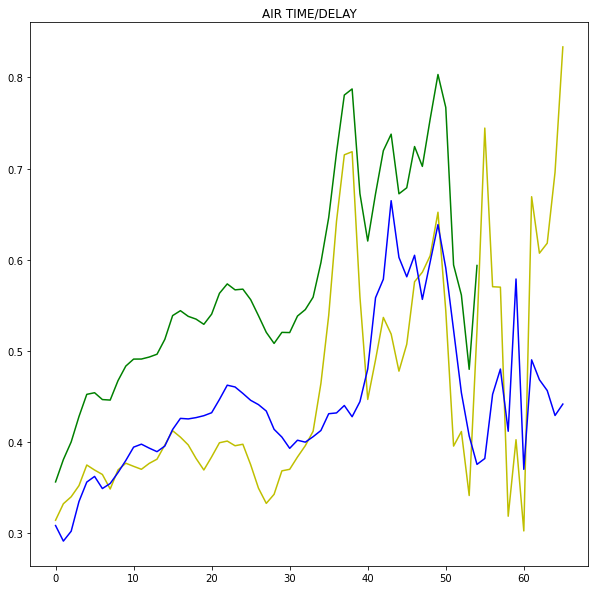

In [76]:
count = df.groupby("AIR_TIME").agg(["count"])["DATE"]
arr_delays = df[["AIR_TIME", "ARRIVAL_DELAY"]].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("AIR_TIME").agg(["count"])
dep_delays = df[["AIR_TIME", "DEPARTURE_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].groupby("AIR_TIME").agg(["count"])
any_delays = arr_delays["ARRIVAL_DELAY"] + dep_delays["DEPARTURE_DELAY"] - df[["AIR_TIME", "DEPARTURE_DELAY", "ARRIVAL_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("AIR_TIME").agg(["count"])["DEPARTURE_DELAY"]
arr_prob = np.array(arr_delays["ARRIVAL_DELAY"]).reshape(-1,)[:660] / np.array(count["count"])[:660]
dep_prob = np.array(dep_delays["DEPARTURE_DELAY"]).reshape(-1,)[:660] / np.array(count["count"])[:660]
any_prob = np.array(any_delays).reshape(-1,)[:660] / np.array(count["count"])[:660]
arr_prob = arr_prob.reshape((66, 10)).mean(axis = 1)
dep_prob = dep_prob.reshape((66, 10)).mean(axis = 1)
any_prob = any_prob.reshape((66, 10)).mean(axis = 1)
f, ax1 = plt.subplots(figsize = (10, 10))
ax1.plot(arr_prob, label = "arrival", c = "y")
ax1.plot(dep_prob, label = "departure", c = "b")
ax1.plot(any_prob, label = "any", c = "g")
ax1.set_title("AIR TIME/DELAY")
plt.show()

Чем выше время - тем больше задержка, как и ожидалось.

In [77]:
A = df.groupby("AIRLINE").agg(["count"])["DATE"]
arr_delays = df[["AIRLINE", "ARRIVAL_DELAY"]].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("AIRLINE").agg(["count"])
dep_delays = df[["AIRLINE", "DEPARTURE_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].groupby("AIRLINE").agg(["count"])
any_delays = arr_delays["ARRIVAL_DELAY"] + dep_delays["DEPARTURE_DELAY"] - df[["AIRLINE", "DEPARTURE_DELAY", "ARRIVAL_DELAY"]].loc[df["DEPARTURE_DELAY"].astype(float) > 0].loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("AIRLINE").agg(["count"])["DEPARTURE_DELAY"]
A["Delays perc"] = np.array(any_delays).reshape(-1,) / np.array(A["count"])
A = A.sort_values(by=('Delays perc'), ascending=False)
A.head(10)

,count,Delays perc
AIRLINE,,
NK,105198,0.578766
UA,463158,0.573778
F9,82142,0.533917
WN,1140890,0.525405
VX,55924,0.508065
B6,240906,0.487460
US,194586,0.473744
AA,638313,0.462040
MQ,257726,0.450560


10 самых злостных опаздунов - и все они крупные авиакомпании

In [78]:
A = A.sort_values(by=('Delays perc'))
A.head(10)

,count,Delays perc
AIRLINE,,
AS,157268,0.403464
DL,796418,0.417980
HA,69863,0.432203
OO,529394,0.443167
EV,511186,0.443872
MQ,257726,0.450560
AA,638313,0.462040
US,194586,0.473744
B6,240906,0.487460


В свою очередь можно заметить, что те, кто мало опаздывают - в основном, опять же, авиакомпании из удаленных уголков США, что можно назвать немного парадоксальным выводом учитывая предыдущее предположение о времени в полете

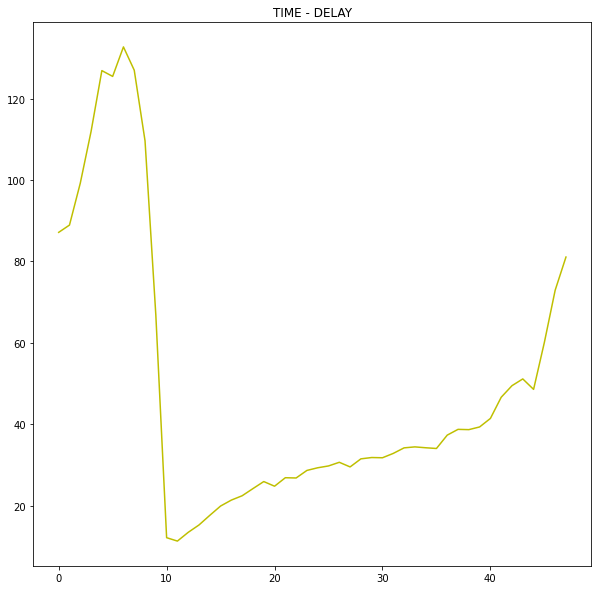

In [84]:
df.ARRIVAL_DELAY = df.ARRIVAL_DELAY.astype(float)
arr_delays = df.loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("DEPARTURE_TIME").mean()["ARRIVAL_DELAY"]
dep_delays = df.loc[df["DEPARTURE_DELAY"].astype(float) > 0].groupby("DEPARTURE_TIME").mean()["DEPARTURE_DELAY"]
arr_delays = np.array(arr_delays).reshape((48, 30)).mean(axis = 1)
dep_delays = np.array(dep_delays).reshape((48, 30)).mean(axis = 1)
f, ax1 = plt.subplots(1, 1, figsize = (10, 10))
ax1.plot(arr_delays, label = "arrival", c = "y")
ax1.set_title("TIME - DELAY")
plt.show()

Можем увидеть, что наименьшее время задержки наблюдается - ночью

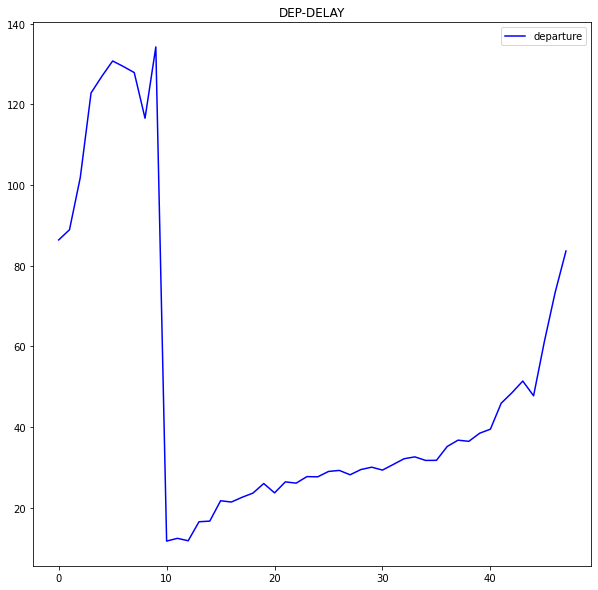

In [91]:
df.ARRIVAL_DELAY = df.ARRIVAL_DELAY.astype(float)
arr_delays = df.loc[df["ARRIVAL_DELAY"].astype(float) > 0].groupby("DEPARTURE_TIME").mean()["ARRIVAL_DELAY"]
dep_delays = df.loc[df["DEPARTURE_DELAY"].astype(float) > 0].groupby("DEPARTURE_TIME").mean()["DEPARTURE_DELAY"]
arr_delays = np.array(arr_delays).reshape((48, 30)).mean(axis = 1)
dep_delays = np.array(dep_delays).reshape((48, 30)).mean(axis = 1)
f, ax1 = plt.subplots(1, 1, figsize = (10, 10))
ax1.plot(dep_delays, label = "departure", c = "b")
ax1.legend()
ax1.set_title("DEP-DELAY")
plt.show()

В свою очередь график времени задержки от времени прилета имеет почти идентичный вид, что позволяет нам сделать вывод о том, что ночью еще и самые частые задержки